In [15]:
#import the modules needed for data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing

%matplotlib inline

In [16]:
works = pd.read_csv(r"C:\Users\IFB19-039\Desktop\mlp\AdvWorksCusts.csv")
ave_spend = pd.read_csv(r"C:\Users\IFB19-039\Desktop\mlp\AW_AveMonthSpend.csv")
bike_buyer = pd.read_csv(r"C:\Users\IFB19-039\Desktop\mlp\AW_BikeBuyer.csv")


In [17]:
#combine all the three datasets
works['AveMonthSpend']=ave_spend['AveMonthSpend']
works['BikeBuyer']=bike_buyer['BikeBuyer']

In [18]:
#examine the first few rows of the dataset
works.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [19]:
works.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [20]:
#display a summary statistics for numeric values
works.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,0.673891,1.500999,0.992009,2.006235,78122.511532,72.405957,0.332284
std,5342.515987,0.468802,1.138962,1.515048,1.682736,39710.985718,27.285370,0.471046
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15604.500000,0.000000,1.000000,0.000000,0.000000,47807.500000,52.000000,0.000000
50%,20221.000000,1.000000,2.000000,0.000000,2.000000,76120.000000,68.000000,0.000000
75%,24860.500000,1.000000,2.000000,2.000000,3.000000,105194.500000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [21]:
#print frequency table for a list of cat. columns
def count_unique(works,cols):
    for col in cols:
        print('\n' + 'For column' + col)
        print(works[col].value_counts())

#define the categorical columns
cat_cols = ['City','StateProvinceName','Education','Occupation']

#call our function
count_unique(works,cat_cols)


For columnCity
London           379
Paris            344
Beaverton        190
Burien           189
Chula Vista      187
                ... 
Monroe             1
Charlotte          1
Newport Hills      1
Chehalis           1
Cerritos           1
Name: City, Length: 270, dtype: int64

For columnStateProvinceName
California             3973
Washington             2038
England                1715
British Columbia       1401
New South Wales        1391
Oregon                  938
Victoria                805
Queensland              717
Saarland                391
Nordrhein-Westfalen     365
Seine (Paris)           344
Hessen                  334
Hamburg                 271
Seine Saint Denis       257
Nord                    248
South Australia         212
Bayern                  200
Hauts de Seine          169
Yveline                 149
Essonne                 133
Tasmania                 92
Loiret                   52
Seine et Marne           52
Moselle                  49
Val d'Oise    

In [22]:
#visualizaing advanture works data for regression


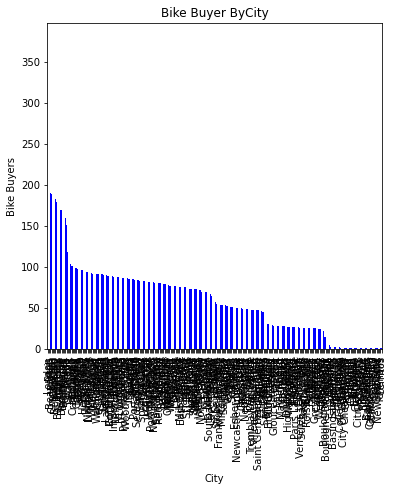

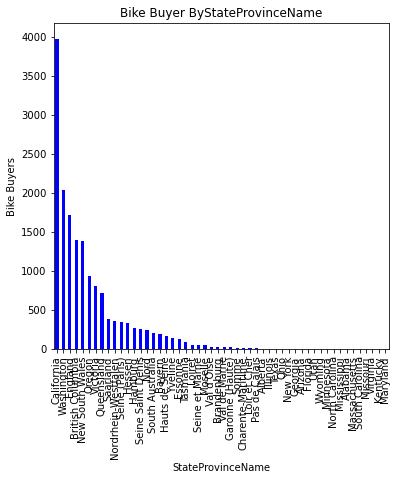

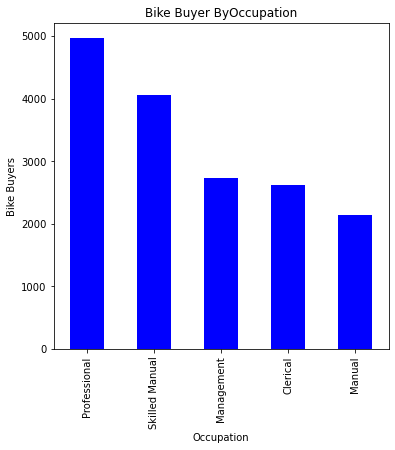

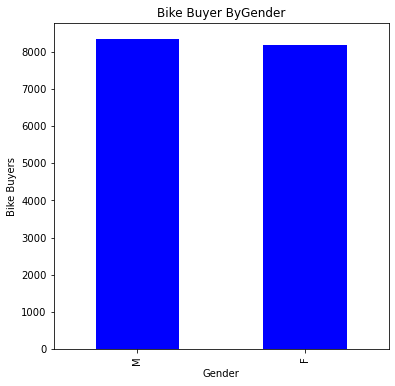

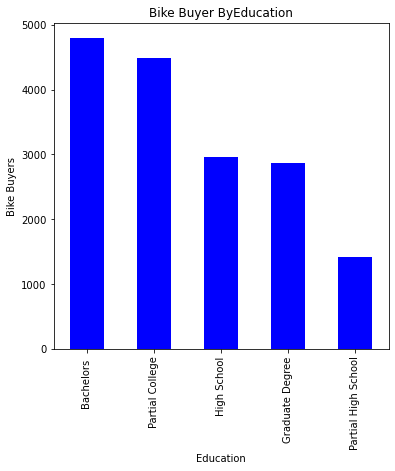

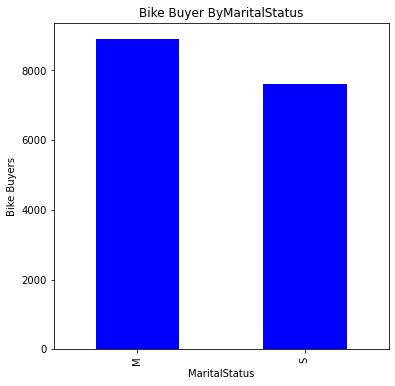

In [23]:
#bar charts
#examines the frequency of categories
def plot_bars(works,cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define the plot area
        ax= fig.gca() # define axis
        counts = works[col].value_counts()#finds the counts for each category
        counts.plot.bar(ax=ax,color='blue')
        ax.set_title('Bike Buyer By' + col) #give the plot title
        ax.set_xlabel(col) #set text for the x axis
        ax.set_ylabel('Bike Buyers')#set text for y label
        plt.show()

plot_cols = ['City','StateProvinceName','Occupation','Gender','Education','MaritalStatus']
plot_bars(works,plot_cols)

In [24]:
#calculate the age 
def calculate_age(end):
    r = relativedelta(pd.to_datetime('now'),pd.to_datetime(end))
    return '{}'.format(r.years)

works['Age']=works['BirthDate'].apply(calculate_age)

#conver age to integer
works['Age'] = works['Age'].astype('int64')

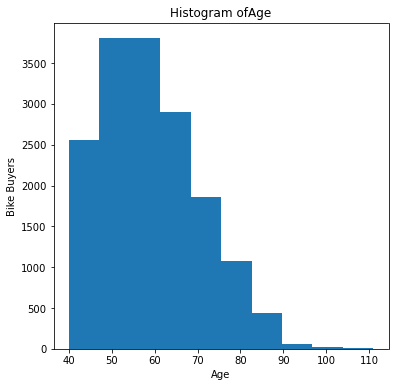

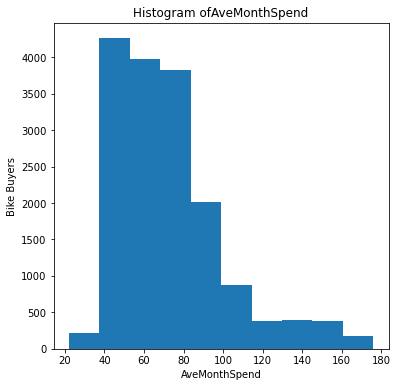

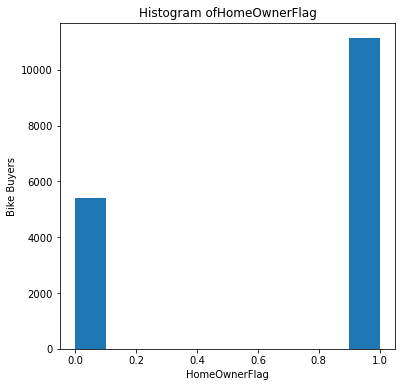

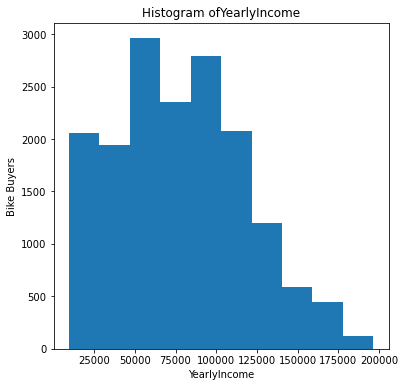

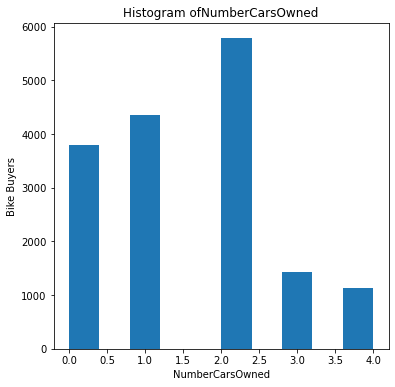

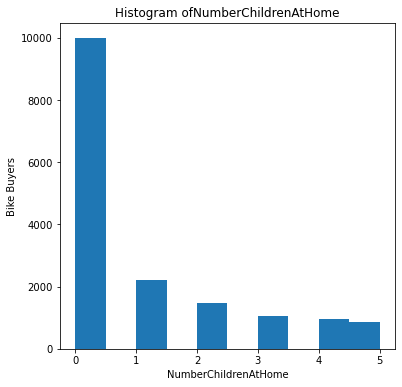

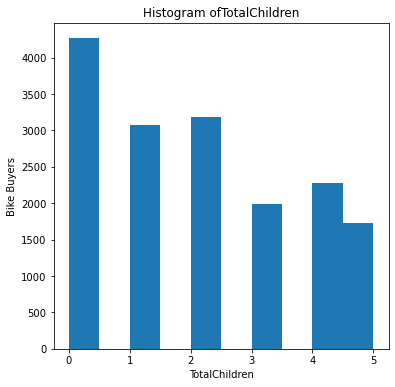

In [27]:
#plot histogram
def plot_histogram(works,cols,bins=10):
    for col in cols:
        fig = plt.figure(figsize=(6,6))#define the plt area
        ax = fig.gca() # define the axis
        works[col].plot.hist(ax=ax,bins=bins)
        ax.set_title('Histogram of'+ col)#title for the plt
        ax.set_xlabel(col)#set the x axis
        ax.set_ylabel('Bike Buyers')#set the tesxt for y axis
    
num_cols = ['Age','AveMonthSpend','HomeOwnerFlag','YearlyIncome','NumberCarsOwned','NumberChildrenAtHome','TotalChildren']
plot_histogram(works,num_cols)

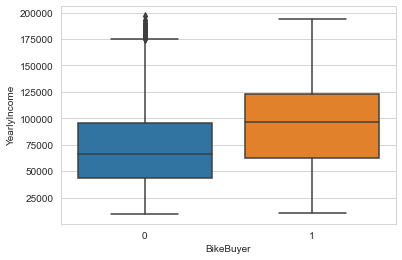

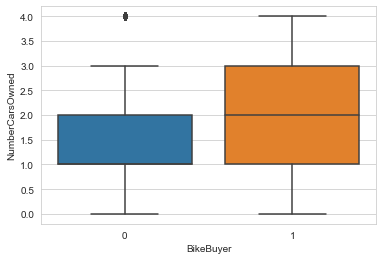

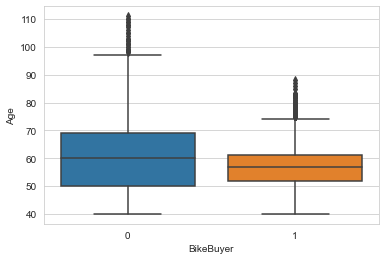

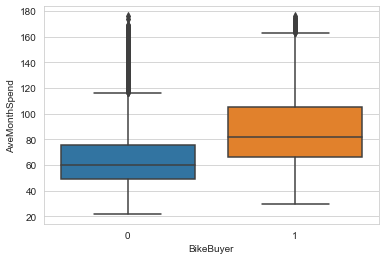

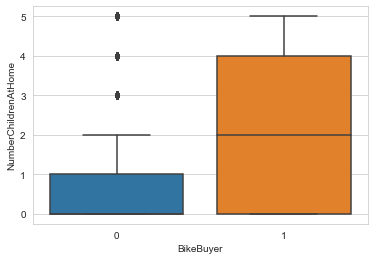

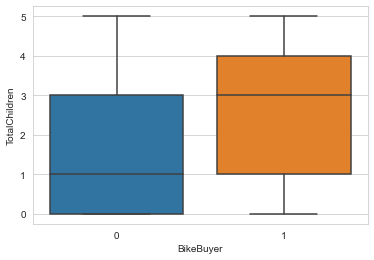

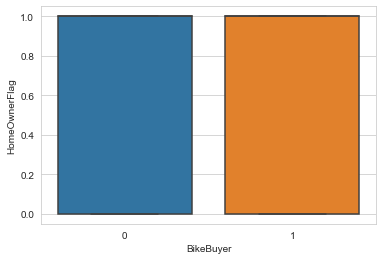

In [29]:
#plot a box plot
def plot_box(works,cols,col_x='BikeBuyer'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(col_x,col,data= works)
        #sns.xlabel(col_x)#set text for the x-axis
        #sns.ylabel(col)#set text fot the y axis
        plt.show()
num_cols = ['YearlyIncome','NumberCarsOwned','Age','AveMonthSpend','NumberChildrenAtHome','TotalChildren','HomeOwnerFlag'
           ]
#plot the box plot
plot_box(works,num_cols)

Occupation


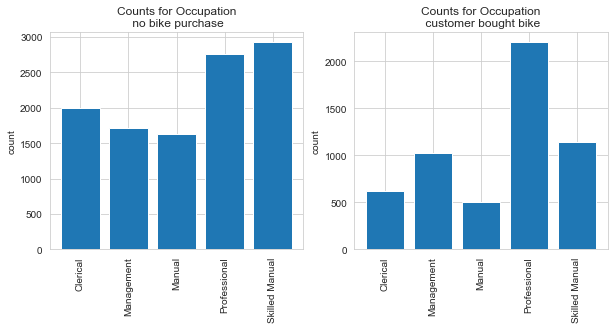

Gender


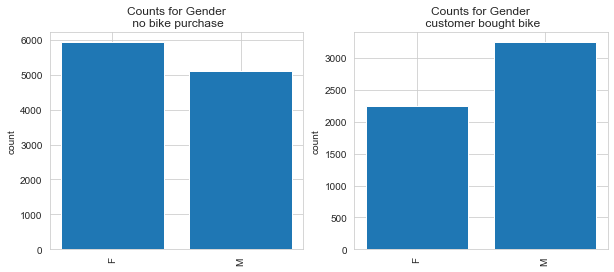

MaritalStatus


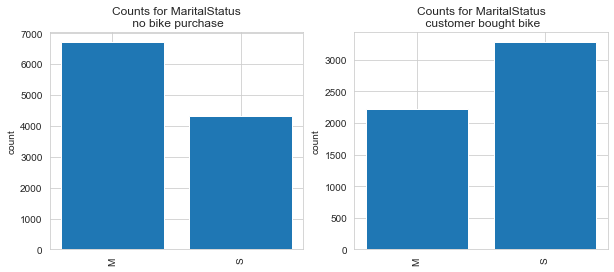

Education


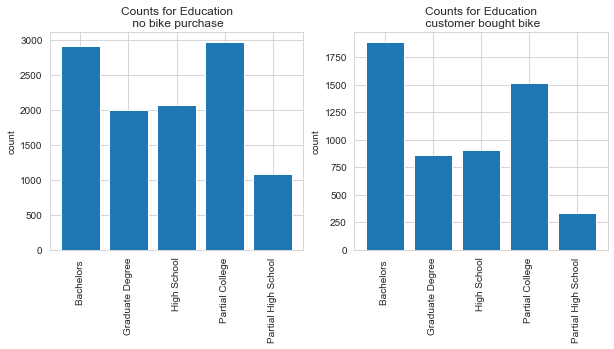

In [30]:
cat_cols = ['Occupation','Gender','MaritalStatus','Education']

works['dummy'] = np.ones(shape = works.shape[0])
for col in cat_cols:
    print(col)
    counts = works[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n no bike purchase')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n customer bought bike')
    plt.ylabel('count')
    plt.show()

In [31]:
works.to_csv('works.csv')